###  QuSpin import

A python package for diagonalization of spin$-\frac{1}{2}$ systems

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from quspin.operators import hamiltonian
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np

### Forming the dataset

### Distribution of energy level spacings for Heizenberg XXZ chain

In [11]:
def plot_dist (N, Jxy, Jzz, perturbation_type, lmbda):
    
    """
    Returns GOE and Poisson distributions of energy level spacings
    
    args:
        N_p: int, number of particles,
        
        Jxy_p: float, xy interaction
        
        Jzz_p: float, zz interaction
        
        m: float, multiplication factor for next-nearest-neighbor interaction (Jzz (i, i + 2) defined as Jzz*m)
    """
    

        
    J_zz  = [[Jzz , i, i+1] for i in range (N - 1)]
    J_pm = [[Jxy / 2, i, i+1] for i in range (N - 1)]
    J_zz_nn = [[lmbda * Jxy, i, i+2] for i in range (N - 2)] # next-nearest-neighbor
    no_checks={"check_herm":False,"check_pcon":False,"check_symm":False}    
    
    if perturbation_type == 'NNN':
        basis = spin_basis_1d (N, pauli=False, Nup=N//2, pblock=1) # zero magnetization and positive parity sector    

        static = [["+-", J_pm],["-+", J_pm],["zz", J_zz], ["zz", J_zz_nn]]  # next-nearest-neighbor
        H_XXZ = hamiltonian (static, [] , basis=basis, dtype=np.float64, **no_checks)
        
    elif perturbation_type == 'impurity':
        middle_spin = int ((N + 1) / 2)
        h_z = [[1., middle_spin]] # magnetic field in the middle of the chain        
        
        static = [["+-", J_pm],["-+", J_pm],["zz", J_zz]]
        static_field = [["z", h_z]]

        basis = spin_basis_1d (N, pauli=False, Nup=N//2, pblock=1) # zero magnetization and positive parity sector    

        # compute hamiltonian for XXZ with field
        
        H_XXZ_0 = hamiltonian (static, [], basis=basis,  dtype=np.float64, **no_checks)
        H_XXZ_1 = hamiltonian (static_field, [], basis=basis,  dtype=np.float64, **no_checks)
        H_XXZ = H_XXZ_0 + lmbda*H_XXZ_1  

    # calculate full eigensystem
    E, V = H_XXZ.eigh()
    
    #calculate level spacings and distributions for integrable model
    
    ss =  np.linspace (0.01, 5, 500)
    
    P_poiss = np.exp (-ss)
    P_WD = np.pi/2 * ss * np.exp( - np.pi/4 * ss ** 2)
    
    
    #calculate level spacings and distributions for NONINTEGRABLE model
    E  = E[abs(E)<1.7]
    energies = E
    
    
    start_indx = 0
    end_indx = len (E) - 1    
    
    tmp = abs( E[start_indx:end_indx-1] - E[start_indx+1:end_indx])
    tmp = tmp [tmp > 0]
    
    s = np.sort(tmp / np.mean(tmp))
    s = s[s<5]    
    
    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
        
    P_s = ax.hist(s, bins = 50, normed = True)[0]


    ax.plot(ss, P_poiss, linestyle = '--', color = 'k', label = 'Poisson')
    ax.plot(ss, P_WD, linestyle = '-.', color = 'r', label = 'GOE')
    ax.legend (loc = 'best', fontsize = 18)
#    plt.title ('nonintergable')
    
    return energies

In [80]:
r_av_NNN = []
lmbdas_NNN = [0.01, .05, 0.1, 0.15, 0.2, 0.25, 0.3]
for lmbda in lmbdas_NNN:
    energies = plot_dist (15, 1., 0.5, 'NNN', lmbda)
    s_n = abs( energies[:-3] - energies[1:-2] )
    s_n_shift = abs( energies[1:-2] - energies[2:-1] )

    r_arr = np.minimum(s_n, s_n_shift)/np.maximum(s_n, s_n_shift)
    
    r_av_NNN.append(np.mean(r_arr))

NameError: global name 'nochecks' is not defined

Text(0,0.5,'$\\langle r \\rangle$')

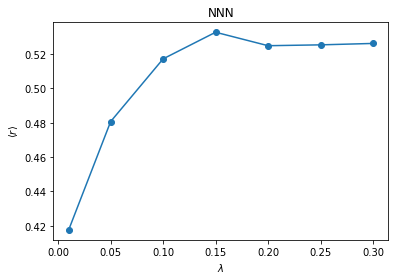

In [68]:
plt.plot(lmbdas_NNN,r_av_NNN, marker = 'o')
plt.title('NNN')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\langle r \rangle$')

Text(0,0.5,'$\\langle r \\rangle$')

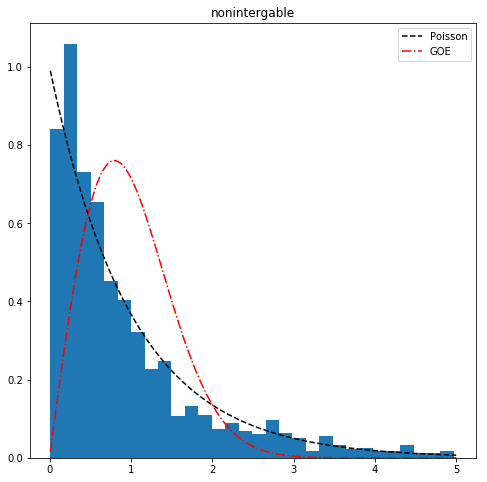

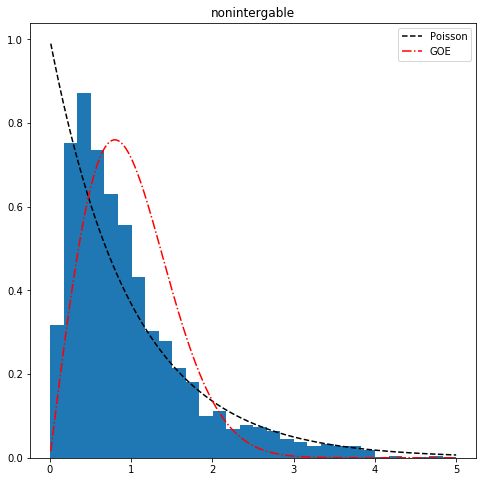

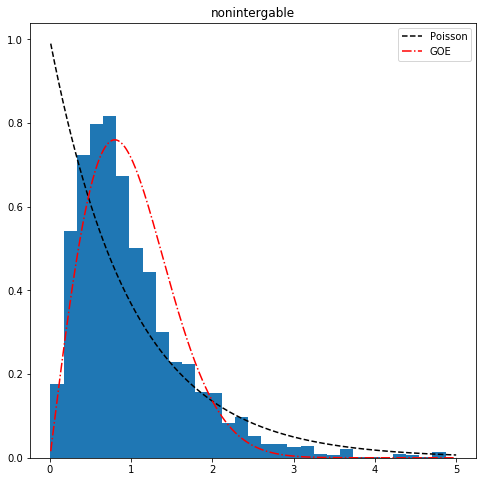

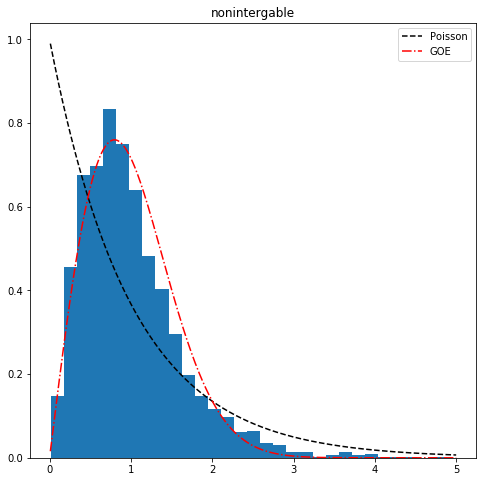

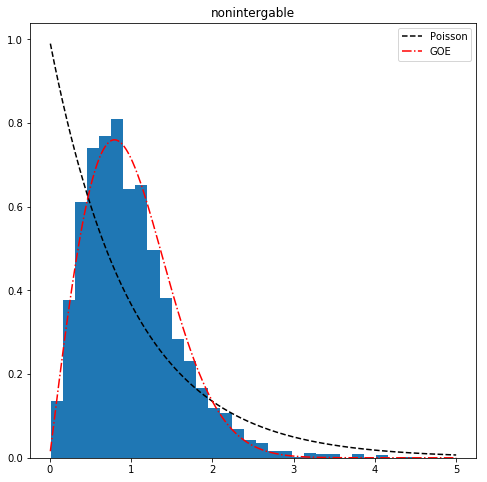

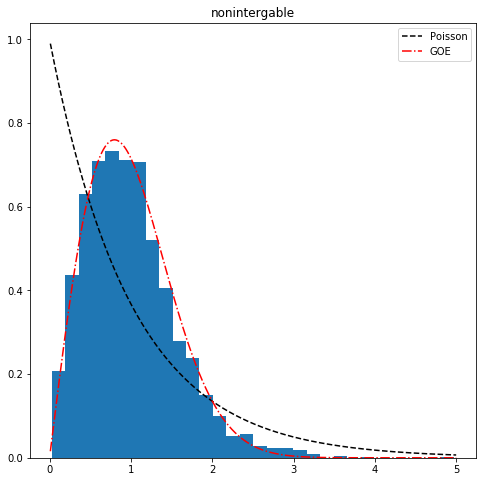

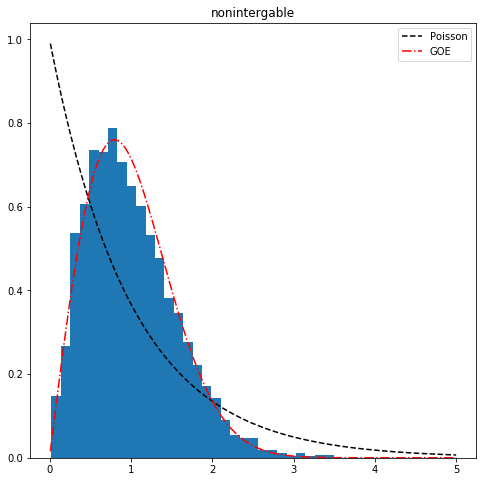

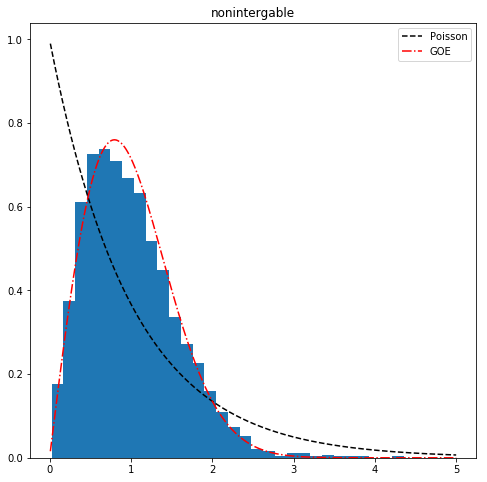

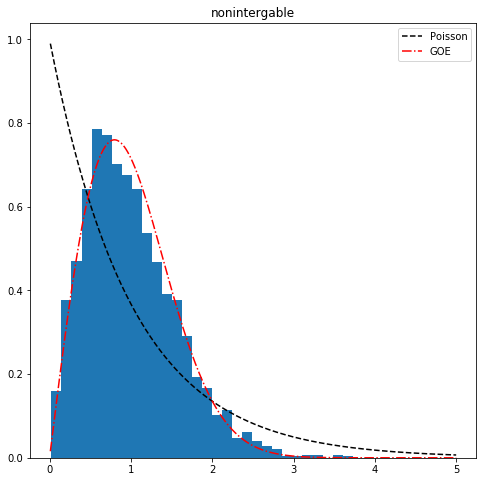

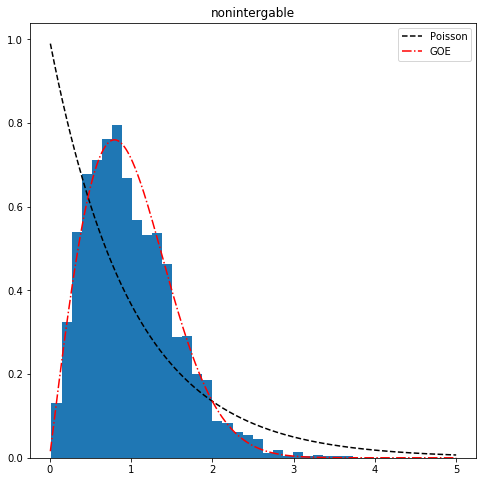

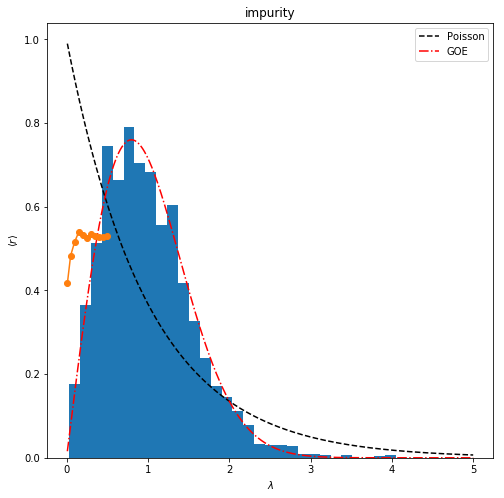

In [90]:
r_av_imp = []
lmbdas_imp = [0.01, .05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
for lmbda in lmbdas_imp:
    energies = plot_dist (15, 1., 0.5, 'impurity', lmbda)
    s_n = abs( energies[:-3] - energies[1:-2] )
    s_n_shift = abs( energies[1:-2] - energies[2:-1] )

    r_arr = np.minimum(s_n, s_n_shift)/np.maximum(s_n, s_n_shift)
    
    r_av_imp.append(np.mean(r_arr))
    


array([-1.69803447, -1.69653035, -1.69353677, ...,  1.69372451,
        1.6950038 ,  1.6999527 ])

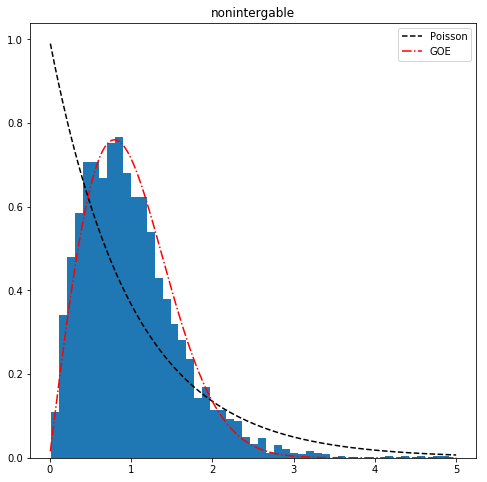

In [7]:
 plot_dist (15, 1., 0.5, 'NNN', 0.17)

array([-1.69918753, -1.69744754, -1.69668523, ...,  1.69092053,
        1.69311232,  1.69753069])

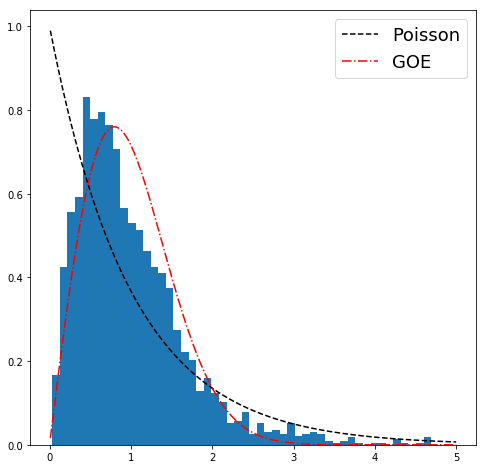

In [12]:
plot_dist (15, 1., 0.5, 'NNN', 0.1)

array([-1.69960591, -1.69872271, -1.69657031, ...,  1.69481626,
        1.6977759 ,  1.69998505])

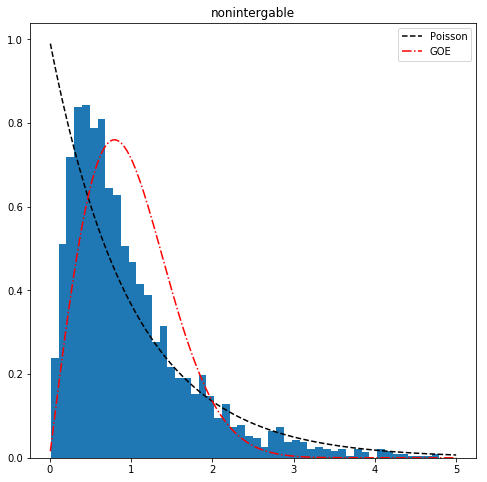

In [9]:
plot_dist (15, 1., 0.5, 'NNN', 0.05)

Text(0,0.5,'$\\langle r \\rangle$')

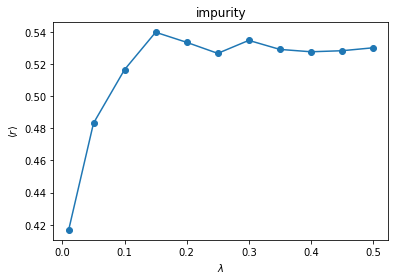

In [91]:
plt.plot(lmbdas_imp,r_av_imp, marker = 'o')
plt.title('impurity')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\langle r \rangle$')